In [1]:
import numpy as np
import matplotlib.pyplot as plt

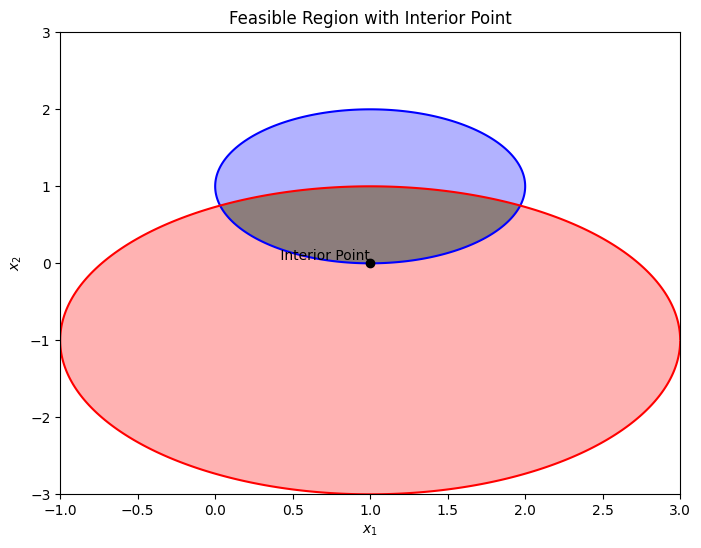

In [6]:
def ineq1(x1, x2):
    return (x1 - 1)**2 + (x2 - 1)**2

def ineq2(x1, x2):
    return (x1 - 1)**2 + (x2 + 1)**2

# Create a grid of points
x1 = np.linspace(-1, 3, 400)
x2 = np.linspace(-3, 3, 400)
x1, x2 = np.meshgrid(x1, x2)

# Calculate the inequalities
f1 = ineq1(x1, x2)
f2 = ineq2(x1, x2)

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.contour(x1, x2, f1, levels=[1], colors='blue') # Boundary for first inequality
plt.contourf(x1, x2, f1, levels=[0, 1], colors='blue', alpha=0.3) # Feasible region for first inequality
plt.contour(x1, x2, f2, levels=[4], colors='red') # Boundary for second inequality
plt.contourf(x1, x2, f2, levels=[0, 4], colors='red', alpha=0.3) # Feasible region for second inequality

# Highlight the intersection (feasible region for both inequalities)
plt.contourf(x1, x2, np.maximum(f1 - 1, f2 - 4), levels=[-np.inf, 0], colors='green', alpha=0.3)

# Choose an interior point (for example, the point (1,0) should be interior to both regions)
interior_point = (1, 0)

# Plot the interior point
plt.plot(interior_point[0], interior_point[1], 'ko') # Black dot
plt.text(interior_point[0], interior_point[1], ' Interior Point', verticalalignment='bottom', horizontalalignment='right')

# Set the labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Feasible Region with Interior Point')
plt.show()


In [19]:
import scipy.optimize as sp
import numpy as np

def f0(x):
    return x[0]**2 + x[1]**2

def phi(x):
    return -np.log(1-((x[0]-1)**2 + (x[1]-1)**2)) - np.log(4-((x[0]-1)**2 + (x[1]+1)**2))

def modified_objective(x, t):
    return t * f0(x) + phi(x)

def barrierMethod(x, t, mu, epsilon):
    x = x0
    t = t0
    
    while mu/t > epsilon:
        value = sp.minimize(modified_objective(x, t))
        x = value
        
        if mu/t < epsilon:
            break
        
        t = mu * t
    
    return x

x0 = np.array([1, 0])
mu = 1 
t0 = 1
epsilon = 1e-3

solution = barrierMethod(x0, t0, mu, epsilon)

print(solution)

C:\Users\xinyi\AppData\Local\Temp\ipykernel_13528\3170329803.py:8: RuntimeWarning: divide by zero encountered in log
  return -np.log(1-((x[0]-1)**2 + (x[1]-1)**2)) - np.log(4-((x[0]-1)**2 + (x[1]+1)**2))


TypeError: minimize() missing 1 required positional argument: 'x0'